# IMPORTING ALL THE REQUIRED DEPENDENCIES

In [104]:
import numpy as np
import pandas as pd
from collections import Counter
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
# MODELS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

# IMPORTING DATASET INTO PANDAS DATAFRAME

In [105]:
credit_card_data=pd.read_csv("C:\\Users\\ASUS\\OneDrive\\Documents\\creditcard.csv")

# SHAPE OF THE DATASET

In [106]:
credit_card_data.shape

(284807, 31)

# FIRST FIVE ROWS OF DATASET

In [107]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# LAST FIVE ROWS OF DATASET

In [108]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


# INFORMATION ABOUT DATASET

In [109]:
credit_card_data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [110]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# CHECKING MISSING VALUE IN THE DATASET

In [111]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# DISTRUBUTIONN OF LEGIT AND FRAUDULENT TRANSACTION

In [112]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [113]:
legit=len(credit_card_data[credit_card_data.Class==0])
fraud=len(credit_card_data[credit_card_data.Class==1])

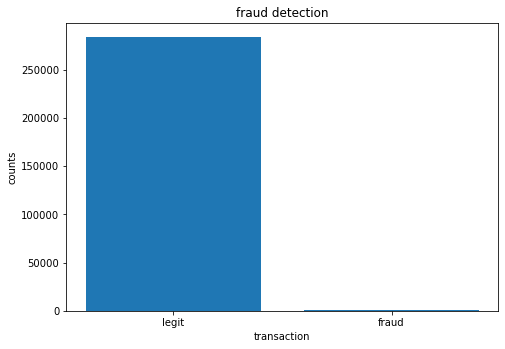

In [114]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
transaction=['legit','fraud']
count=[legit,fraud]
ax.bar(transaction,count)
plt.xlabel('transaction')
plt.ylabel('counts')
plt.title('fraud detection')
plt.show()

In [115]:
# THIS DATASET IS HIGHLY UNBALANCED HENCE ITS HARDER FOR OUR MODEL TO COMPARE BECAUSE ONE PART CONSISTS OF MORE THAN 90% OF DATA
# SO IT WILL JUDGE ON THE BASIC OF MAJORITY DATA BUT NOT THE MINORITY DATA

# SEPERATING THE DATA FOR ANALYSIS

In [116]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

# SHAPE OF LEGIT & FRAUD DATA

In [117]:
legit.shape

(284315, 31)

In [118]:
fraud.shape

(492, 31)

# STATISTICAL MEASUREMENT OF DATA

In [119]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [120]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# SPLITTING DATA INTO TRAINING AND TESTING DATA

In [121]:
X = credit_card_data.drop(columns='Class',axis=1)
Y = credit_card_data['Class']

In [122]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

# MODEL BUILDING :

# RANDOM FOREST CLASSIFIER

In [123]:
model = RandomForestClassifier()
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [124]:
n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is Random Forest Classifier")
  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))
  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))
  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))
  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is Random Forest Classifier
The accuracy is 0.9996664442961974
The precision is 0.9452054794520548
The recall is 0.8214285714285714
The F1-Score is 0.8789808917197452


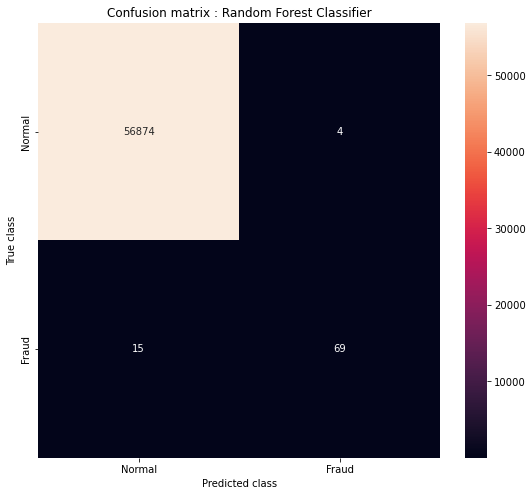

In [125]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Random Forest Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# LOGISTIC REGRESSION

In [126]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train,Y_train)
Y_predict = LRmodel.predict(X_test)

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [127]:
n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is Logistic Regression")
  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))
  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))
  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))
  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is Logistic Regression
The accuracy is 0.9988764439450862
The precision is 0.5943396226415094
The recall is 0.75
The F1-Score is 0.6631578947368421


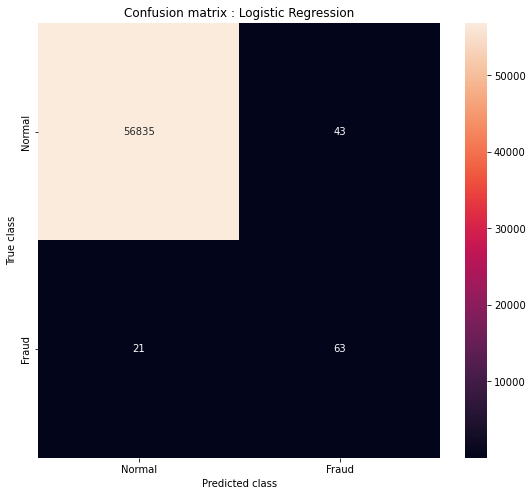

In [128]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# K NEIGHBOUR CLASSIFIER

In [129]:
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train,Y_train)
Y_predict = KNNmodel.predict(X_test)

In [130]:
n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is K Neighbors Classifier")
  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))
  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))
  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))
  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is K Neighbors Classifier
The accuracy is 0.9986482216214319
The precision is 1.0
The recall is 0.08333333333333333
The F1-Score is 0.15384615384615385


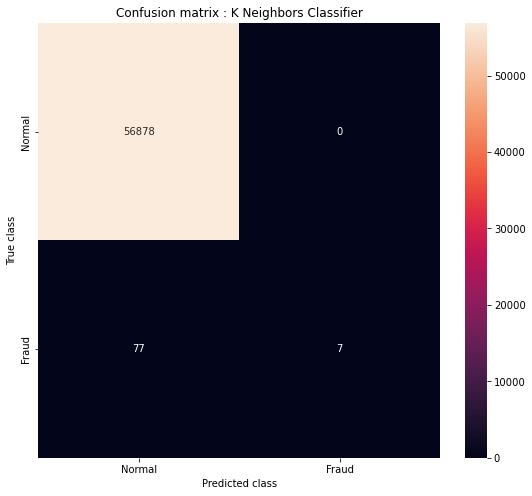

In [131]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : K Neighbors Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# DECISION TREE CLASSIFIER

In [132]:
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train,Y_train)
Y_predict = DTmodel.predict(X_test)

In [133]:
n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is Decision Tree Classifier")
  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))
  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))
  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))
  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is Decision Tree Classifier
The accuracy is 0.9993328885923949
The precision is 0.7738095238095238
The recall is 0.7738095238095238
The F1-Score is 0.7738095238095238


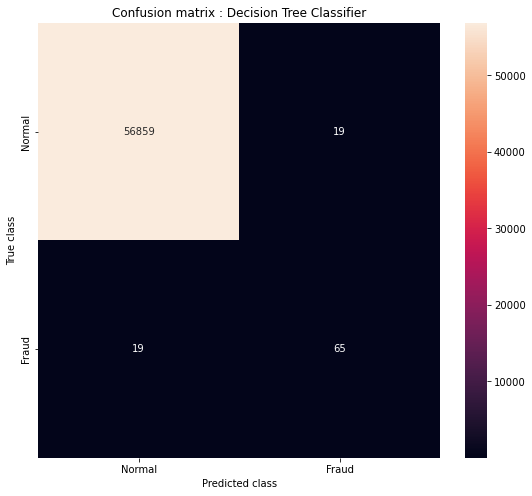

In [134]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Decision Tree Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# OVERSAMPLING THE UNBALANCED DATA FOR BETTER RESULTS

In [135]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [136]:
X_train_smote, Y_train_smote = smote.fit_resample(X_train.astype('float'),Y_train)

In [137]:
print("Before smote : ", Counter(Y_train))
print("After smote : ", Counter(Y_train_smote))

Before smote :  Counter({0: 227437, 1: 408})
After smote :  Counter({0: 227437, 1: 227437})


# RANDOM FOREST AFTER OVERSAMPLING

In [138]:
model.fit(X_train_smote,Y_train_smote)
Y_predict = model.predict(X_test)

n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is Random Forest Classifier")  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is Random Forest Classifier
The accuracy is 0.9995962220427653
The precision is 0.8765432098765432
The recall is 0.8452380952380952
The F1-Score is 0.8606060606060606


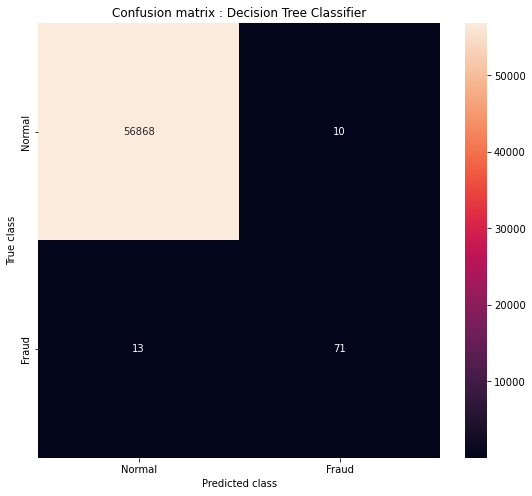

In [139]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Decision Tree Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# LOGISTIC REGRESSION AFTER OVERSAMPLING

In [140]:
LRmodel.fit(X_train_smote,Y_train_smote)
Y_predict = LRmodel.predict(X_test)

n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is LogisticRegression")  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is LogisticRegression
The accuracy is 0.9849724377655279
The precision is 0.08134490238611713
The recall is 0.8928571428571429
The F1-Score is 0.14910536779324055


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


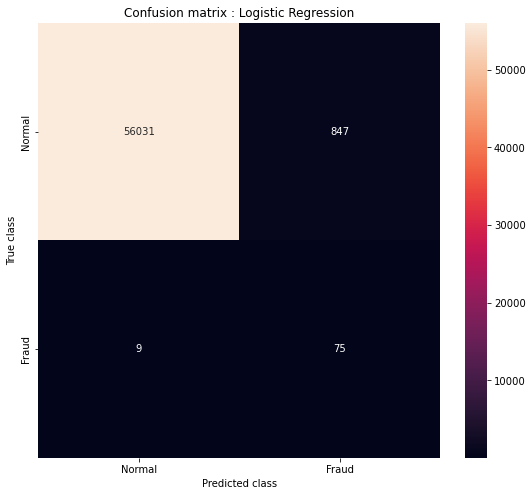

In [141]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Logistic Regression")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# K NEIGHBORS CLASSIFIER AFTER OVERSAMPLING

In [142]:
KNNmodel.fit(X_train_smote,Y_train_smote)
Y_predict = KNNmodel.predict(X_test)

n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is K Neighbors Classifier")  
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is K Neighbors Classifier
The accuracy is 0.9466661985183105
The precision is 0.017004578155657292
The recall is 0.6190476190476191
The F1-Score is 0.03309993634627626


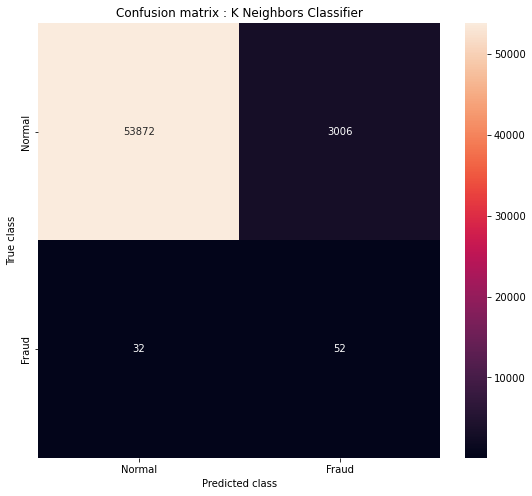

In [143]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : K Neighbors Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# DECISION TREE AFTER OVERSAMPLING

In [144]:
DTmodel.fit(X_train_smote,Y_train_smote)
Y_predict = DTmodel.predict(X_test)

n_outliers = len(fraud)
n_errors = (Y_predict != Y_test).sum()
print("The model used is Decision Tree Classifier")
acc = accuracy_score(Y_test, Y_predict)
print("The accuracy is {}".format(acc))  
prec = precision_score(Y_test, Y_predict)
print("The precision is {}".format(prec))  
rec = recall_score(Y_test, Y_predict)
print("The recall is {}".format(rec))  
f1 = f1_score(Y_test, Y_predict)
print("The F1-Score is {}".format(f1))

The model used is Decision Tree Classifier
The accuracy is 0.9976299989466662
The precision is 0.36507936507936506
The recall is 0.8214285714285714
The F1-Score is 0.5054945054945055


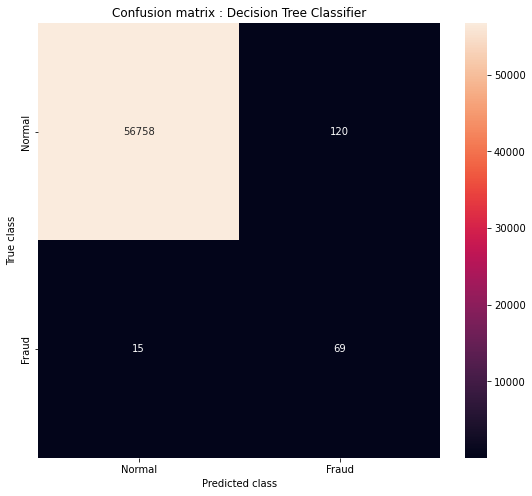

In [145]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_test, Y_predict)
plt.figure(figsize =(9, 8))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix : Decision Tree Classifier")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Random Forest Classifier has the best accuracy score in both conditions before (99.96%) and after (99.95%) resampling of data.